<a href="https://colab.research.google.com/github/ryzhokhina/Tensorflow-Dev-Exam-Preparation/blob/main/NN_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

* Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.
* Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?
* Try and improve the results we got on the insurance dataset, some things you might want to try include:
* Building a larger model (how does one with 4 dense layers go?).
* Increasing the number of units in each layer.
* Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x?
* What happens if you train for longer (say 300 epochs instead of 200)?





In [2]:
tf.random.set_seed = 42

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [4]:
x_train.shape, y_train.shape

((404, 13), (404,))

 * CRIM     per capita crime rate by town
 * ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 * INDUS    proportion of non-retail business acres per town
 * CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 * NOX      nitric oxides concentration (parts per 10 million)
 * RM       average number of rooms per dwelling
 * AGE      proportion of owner-occupied units built prior to 1940
 * DIS      weighted distances to five Boston employment centres
 * RAD      index of accessibility to radial highways
 * TAX      full-value property-tax rate per 10000 dollars
 * PTRATIO  pupil-teacher ratio by town
 * B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 * LSTAT    % lower status of the population
 * MEDV     Median value of owner-occupied homes in $1000's

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT MEDV']

In [7]:
x_train_df = pd.DataFrame(x_train, columns = columns)

In [8]:
x_train_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


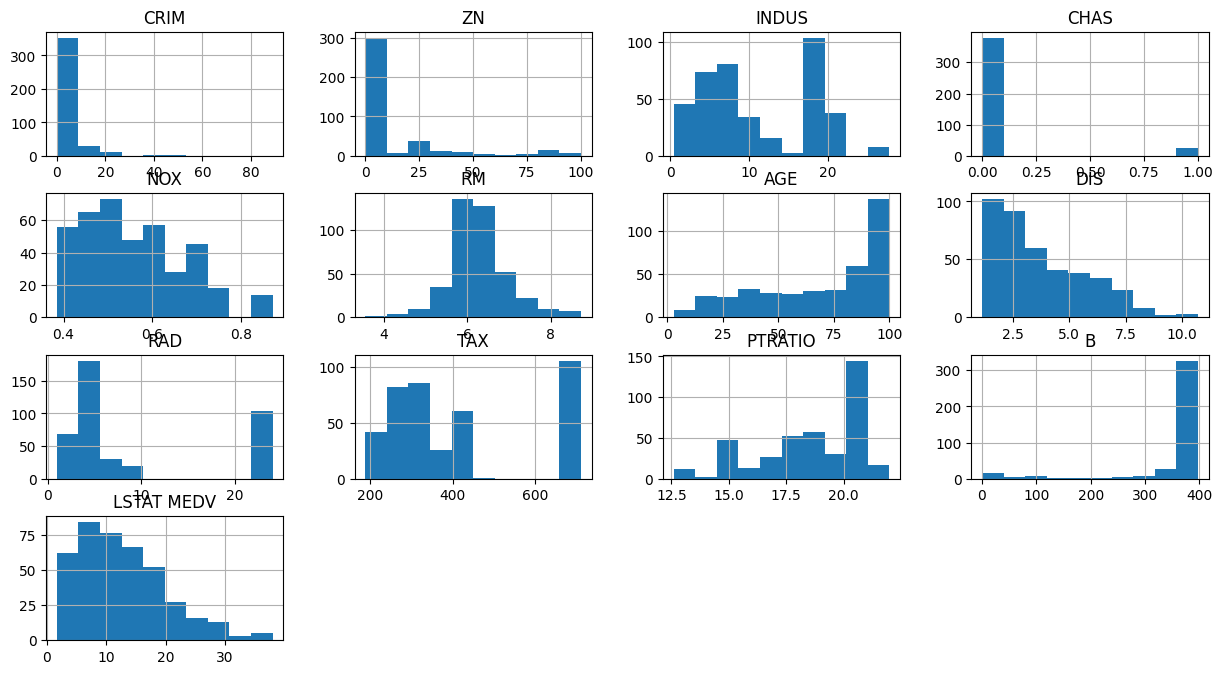

In [9]:
x_train_df.hist(layout=(5,4), figsize=(15,10))
plt.show()


In [10]:
x_train_df.CHAS.value_counts()

0.0    379
1.0     25
Name: CHAS, dtype: int64

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer

In [16]:
x_train_df.columns[~x_train_df.columns.isin(['CHAS'])]

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT MEDV'],
      dtype='object')

In [21]:
ct = make_column_transformer((MinMaxScaler(),x_train_df.columns[~x_train_df.columns.isin(['CHAS'])]), remainder = 'passthrough')

In [22]:
ct.fit(x_train_df)

ColumnTransformer(remainder='passthrough',
                  transformers=[('minmaxscaler', MinMaxScaler(),
                                 Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT MEDV'],
      dtype='object'))])

In [23]:
x_test_df = pd.DataFrame(x_test, columns= x_train_df.columns)

In [24]:
x_test_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT MEDV
0,18.08460,0.0,18.10,0.0,0.679,6.434,100.0,1.8347,24.0,666.0,20.2,27.25,29.05
1,0.12329,0.0,10.01,0.0,0.547,5.913,92.9,2.3534,6.0,432.0,17.8,394.95,16.21
2,0.05497,0.0,5.19,0.0,0.515,5.985,45.4,4.8122,5.0,224.0,20.2,396.90,9.74
3,1.27346,0.0,19.58,1.0,0.605,6.250,92.6,1.7984,5.0,403.0,14.7,338.92,5.50
4,0.07151,0.0,4.49,0.0,0.449,6.121,56.8,3.7476,3.0,247.0,18.5,395.15,8.44


<Axes: >

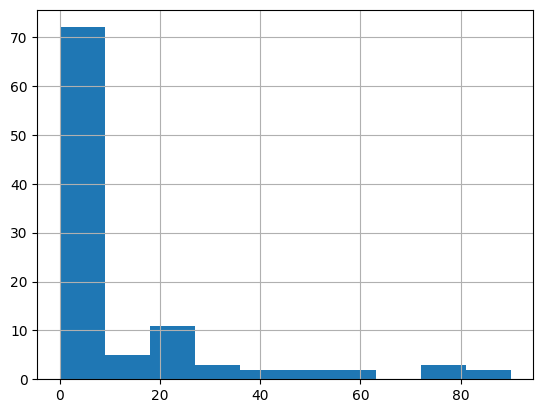

In [27]:
x_test_df.ZN.hist()

In [30]:
x_train_df_norm = ct.transform(x_train_df)
x_test_df_norm = ct.transform(x_test_df)

In [34]:
x_train_df_norm.shape, x_test_df_norm.shape

((404, 13), (102, 13))

## Create model

In [35]:
from keras.layers import Dense
from keras.models import Sequential

In [49]:
from keras.engine.input_layer import InputLayer

model = keras.models.Sequential((
    InputLayer(input_shape = x_train.shape[1]),
    Dense(10),
    Dense(100),
    Dense(50),
    Dense(10),
    Dense(1)
))
model.compile(optimizer = keras.optimizers.Adam(), loss = 'mae', metrics = 'mae')

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                140       
                                                                 
 dense_16 (Dense)            (None, 100)               1100      
                                                                 
 dense_17 (Dense)            (None, 50)                5050      
                                                                 
 dense_18 (Dense)            (None, 10)                510       
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 6,811
Trainable params: 6,811
Non-trainable params: 0
_________________________________________________________________


In [51]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=5)
history = model.fit(x_train_df_norm, y_train, epochs = 200, callbacks = [callback])

Epoch 1/200
13/13 [==============================] - 1s 2ms/step - loss: 20.6654 - mae: 20.6654
Epoch 2/200
13/13 [==============================] - 0s 2ms/step - loss: 14.9446 - mae: 14.9446
Epoch 3/200
13/13 [==============================] - 0s 3ms/step - loss: 9.0570 - mae: 9.0570
Epoch 4/200
13/13 [==============================] - 0s 3ms/step - loss: 7.8225 - mae: 7.8225
Epoch 5/200
13/13 [==============================] - 0s 2ms/step - loss: 6.4020 - mae: 6.4020
Epoch 6/200
13/13 [==============================] - 0s 2ms/step - loss: 5.5149 - mae: 5.5149
Epoch 7/200
13/13 [==============================] - 0s 3ms/step - loss: 5.0860 - mae: 5.0860
Epoch 8/200
13/13 [==============================] - 0s 2ms/step - loss: 4.9479 - mae: 4.9479
Epoch 9/200
13/13 [==============================] - 0s 2ms/step - loss: 4.8717 - mae: 4.8717
Epoch 10/200
13/13 [==============================] - 0s 2ms/step - loss: 4.7438 - mae: 4.7438
Epoch 11/200
13/13 [==============================] - 0

<Axes: >

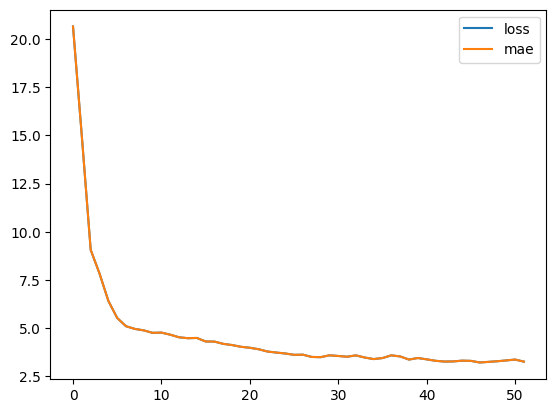

In [52]:
pd.DataFrame(history.history).plot()

In [55]:
model.evaluate(x_test_df_norm, y_test)

4/4 [==============================] - 0s 9ms/step - loss: 3.0306 - mae: 3.0306


[3.030576467514038, 3.030576467514038]

In [56]:
pred_y = model.predict(x_test_df_norm)

4/4 [==============================] - 0s 4ms/step


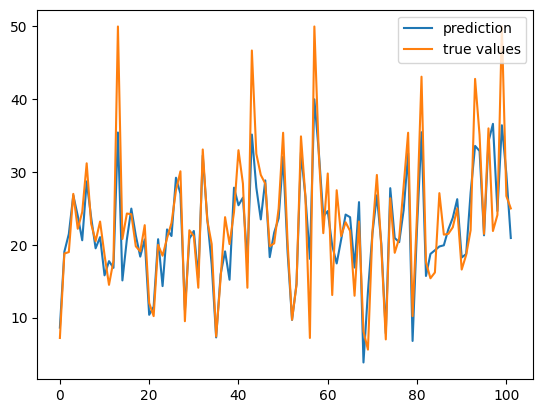

In [57]:
plt.plot(pred_y, label = 'prediction')
plt.plot(y_test, label = 'true values')
plt.legend()
plt.show()

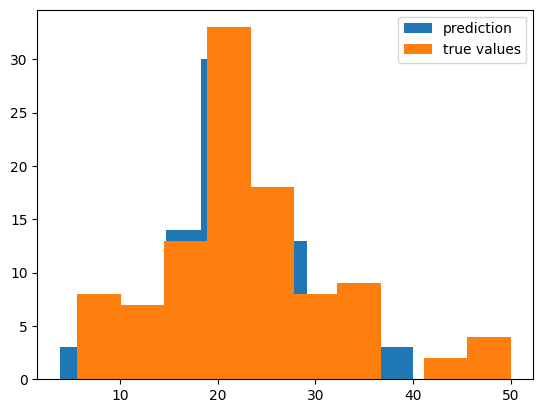

In [62]:
plt.hist(pred_y, label = 'prediction')
plt.hist(y_test, label = 'true values')
plt.legend()
plt.show()

(array([ 15.,  48.,  72., 120.,  64.,  31.,  21.,   8.,   8.,  17.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

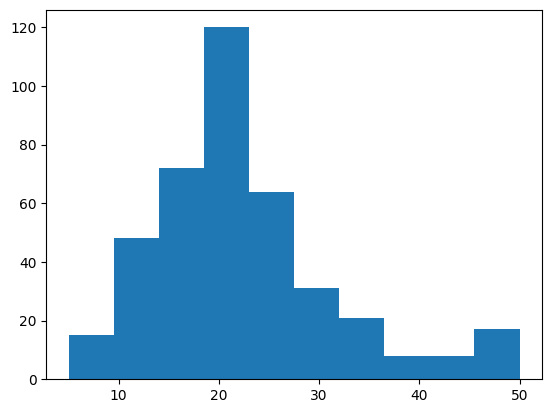

In [61]:
plt.hist(y_train)

### Change learning rate

In [67]:
model.compile(optimizer = keras.optimizers.Adam(0.00001), loss = 'mae', metrics = 'mae')
history = model.fit(x_train_df_norm, y_train, epochs = 300, callbacks = [callback])

Epoch 1/300
13/13 [==============================] - 1s 3ms/step - loss: 3.1657 - mae: 3.1657
Epoch 2/300
13/13 [==============================] - 0s 2ms/step - loss: 3.1635 - mae: 3.1635
Epoch 3/300
13/13 [==============================] - 0s 2ms/step - loss: 3.1599 - mae: 3.1599
Epoch 4/300
13/13 [==============================] - 0s 2ms/step - loss: 3.1581 - mae: 3.1581
Epoch 5/300
13/13 [==============================] - 0s 3ms/step - loss: 3.1556 - mae: 3.1556
Epoch 6/300
13/13 [==============================] - 0s 3ms/step - loss: 3.1538 - mae: 3.1538
Epoch 7/300
13/13 [==============================] - 0s 3ms/step - loss: 3.1519 - mae: 3.1519
Epoch 8/300
13/13 [==============================] - 0s 2ms/step - loss: 3.1512 - mae: 3.1512
Epoch 9/300
13/13 [==============================] - 0s 3ms/step - loss: 3.1495 - mae: 3.1495
Epoch 10/300
13/13 [==============================] - 0s 3ms/step - loss: 3.1476 - mae: 3.1476
Epoch 11/300
13/13 [==============================] - 0s 2m

In [68]:
model.evaluate(x_test_df_norm, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 3.1082 - mae: 3.1082


[3.108232021331787, 3.108232021331787]

4/4 [==============================] - 0s 3ms/step


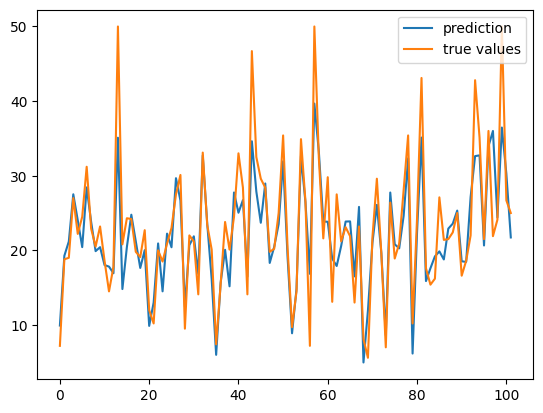

In [69]:
plt.plot(model.predict(x_test_df_norm), label = 'prediction')
plt.plot(y_test, label = 'true values')
plt.legend()
plt.show()